##intall dependencies
install geopy https://github.com/geopy/geopy:
pip install geopy

In [1]:
from geopy.geocoders import Nominatim
import numpy as np
from matplotlib import pyplot

In [2]:
geolocator = Nominatim()

In [8]:
location = geolocator.geocode("55104")

In [9]:
print(location.address)

St. Paul, Ramsey County, Minnesota, 55104, United States of America


In [10]:
print((location.latitude, location.longitude))

(44.9547181116364, -93.1623445934963)


In [6]:
%matplotlib inline

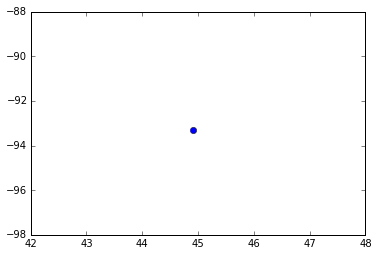

In [7]:
pyplot.plot(location.latitude, location.longitude, 'o')

In [21]:
from mpl_toolkits.basemap import Basemap

ImportError: No module named basemap

### combining accessibility scores

- w: walkability score 
- t: transit score
- m: MetroTransit access score

a = 1/3* w + 1/3 * t + 1/3 * m

